In [1]:
import pandas as pd
from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_ttc.csv')

In [3]:
df.head()

,Date,Route,Time,Day,Location,Incident,MinDelay,MinGap,Direction,Vehicle,Month
0,2022-01-01,325,02:00:00,Saturday,"OVERLEA & THORCLIFFE, Toronto",Diversion,131,161,W,8658,January
1,2022-01-01,320,02:00:00,Saturday,"YONGE & STEELES, Toronto",Operations - Operator,17,20,S,0,January
2,2022-01-01,320,02:00:00,Saturday,"YONGE & STEELES, Toronto",Operations - Operator,4,11,S,0,January
3,2022-01-01,320,02:00:00,Saturday,"YONGE & STEELES, Toronto",Operations - Operator,4,8,S,0,January
4,2022-01-01,363,02:30:00,Saturday,"KING & SHAW, Toronto",Operations - Operator,30,60,A,0,January


In [4]:
top_20_locations = df.groupby('Location').agg({'MinDelay': 'count', 'Route': 'first'})\
                     .sort_values('MinDelay', ascending=False).head(20)\
                     .reset_index().rename(columns={'MinDelay': 'Count'})
top_20_locations

,Location,Count,Route
0,"KIPLING , Toronto",608,300
1,"PIONEER VILLAGE STATIO, Toronto",576,41
2,"KENNEDY , Toronto",562,116
3,"FINCH , Toronto",553,53
4,"EGLINTON , Toronto",479,32
5,"WILSON , Toronto",409,29
6,"EGLINTON WEST , Toronto",399,79
7,"WILSON GARAGE, Toronto",343,107
8,"SHEPPARD WEST , Toronto",300,84
9,"FINCH WEST , Toronto",294,36


In [5]:
top_20_locations['Location'] = top_20_locations['Location'].replace('PIONEER VILLAGE STATIO, Toronto', 'PIONEER VILLAGE STATION, Toronto')
top_20_locations['Location'] = top_20_locations['Location'].replace('SCARBOROUGH CENTRE STA, Toronto', 'SCARBOROUGH CENTRE STATION, Toronto')

In [6]:
top_20_locations

,Location,Count,Route
0,"KIPLING , Toronto",608,300
1,"PIONEER VILLAGE STATION, Toronto",576,41
2,"KENNEDY , Toronto",562,116
3,"FINCH , Toronto",553,53
4,"EGLINTON , Toronto",479,32
5,"WILSON , Toronto",409,29
6,"EGLINTON WEST , Toronto",399,79
7,"WILSON GARAGE, Toronto",343,107
8,"SHEPPARD WEST , Toronto",300,84
9,"FINCH WEST , Toronto",294,36


In [7]:
def get_lat_long(location):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(location, timeout=None)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

top_20_locations[['latitude', 'longitude']] = top_20_locations['Location'].apply(get_lat_long).apply(pd.Series)


In [8]:
top_20_locations


,Location,Count,Route,latitude,longitude
0,"KIPLING , Toronto",608,300,43.637616,-79.535508
1,"PIONEER VILLAGE STATION, Toronto",576,41,43.776878,-79.508938
2,"KENNEDY , Toronto",562,116,43.732429,-79.263753
3,"FINCH , Toronto",553,53,43.781297,-79.415899
4,"EGLINTON , Toronto",479,32,43.706123,-79.398530
5,"WILSON , Toronto",409,29,43.734476,-79.450062
6,"EGLINTON WEST , Toronto",399,79,43.700017,-79.436396
7,"WILSON GARAGE, Toronto",343,107,NaN,NaN
8,"SHEPPARD WEST , Toronto",300,84,43.749299,-79.462248
9,"FINCH WEST , Toronto",294,36,43.764020,-79.491523


In [9]:
import plotly.express as px

In [10]:
px.scatter_mapbox(top_20_locations, lat="latitude",
                  lon="longitude",
                  color="Route",
                  size="Count",
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron",labels="Location")

In [ ]:
# Now Using the same dataset to see the top 200 delays locationwise

In [11]:
pd.set_option('display.max_rows', None)
top_200_locations = df.groupby('Location').agg({'MinDelay': 'count', 'Route': 'first'})\
                     .sort_values('MinDelay', ascending=False).head(200)\
                     .reset_index().rename(columns={'MinDelay': 'Count'})
top_200_locations

,Location,Count,Route
0,"KIPLING , Toronto",608,300
1,"PIONEER VILLAGE STATIO, Toronto",576,41
2,"KENNEDY , Toronto",562,116
3,"FINCH , Toronto",553,53
4,"EGLINTON , Toronto",479,32
5,"WILSON , Toronto",409,29
6,"EGLINTON WEST , Toronto",399,79
7,"WILSON GARAGE, Toronto",343,107
8,"SHEPPARD WEST , Toronto",300,84
9,"FINCH WEST , Toronto",294,36


In [16]:
# Replace values in "Location" column
top_200_locations["Location"] = top_200_locations["Location"].replace({
    'PIONEER VILLAGE STATIO, Toronto':'PIONEER VILLAGE STATION, Toronto',
    'SCARBOROUGH CENTRE STA, Toronto': 'SCARBOROUGH CENTRE STATION, Toronto',
    "VICTORIA PARK AND STEE,Toronto": "VICTORIA PARK AND STEEL,Toronto",
    "PEARSON AIRPORT TERMIN,Toronto": "PEARSON AIRPORT TERMINAL,Toronto",
    "PEARSON AIRPORT - TERM,Toronto": "PEARSON AIRPORT TERMINAL,Toronto",
    "SCARBOROUGH TOWN CENTR,Toronto": "SCARBOROUGH TOWN CENTRE,Toronto",
    'STEELES & MARTIN GRO, Toronto': 'STEELES & MARTIN GROVE, Toronto',
    'DONL&S , Toronto': 'DONLAND , Toronto',
    'SHEPPARD & RIVALDA, Toronto':'SHEPPARD & RIVALDALE, Toronto',
    'VICTORIA PARK & SHEP, Toronto': 'VICTORIA PARK AND SHEPPARD, Toronto',
    'MEADOWVALE & SHEPPAR, Toronto':'MEADOWVALE & SHEPPARD, Toronto',
    'VICTORIA PARK & LAWR, Toronto': 'VICTORIA PARK & LAWRANCE, Toronto',
    'EGLINTON & MIDL&, Toronto': 'EGLINTON & MIDLAND, Toronto',
    'FRESHMEADOW & DON MI, Toronto': 'FRESHMEADOW & DON MILLS, Toronto',
    'AMAZON FULFILLMENT CEN, Toronto': 'AMAZON FULFILLMENT CENTRE, Toronto',
    'MORNINGSIDE & ELLESM, Toronto': 'MORNINGSIDE & ELLESMERE, Toronto',
    '&': 'AND'
})
top_200_locations['Location'] = top_200_locations['Location'].str.replace('&', 'and')
# Drop rows with specific values in "Location" column
drop_list = ["GREENWIN VILLAGE AND B,Toronto", "UNKNOWN,Toronto"]
top_200_locations = top_200_locations[~top_200_locations["Location"].isin(drop_list)]
top_200_locations

,Location,Count,Route,latitude,longitude
0,"KIPLING , Toronto",608,300,43.637616,-79.535508
1,"PIONEER VILLAGE STATION, Toronto",576,41,43.776878,-79.508938
2,"KENNEDY , Toronto",562,116,43.732429,-79.263753
3,"FINCH , Toronto",553,53,43.781297,-79.415899
4,"EGLINTON , Toronto",479,32,43.706123,-79.398530
5,"WILSON , Toronto",409,29,43.734476,-79.450062
6,"EGLINTON WEST , Toronto",399,79,43.700017,-79.436396
7,"WILSON GARAGE, Toronto",343,107,NaN,NaN
8,"SHEPPARD WEST , Toronto",300,84,43.749299,-79.462248
9,"FINCH WEST , Toronto",294,36,43.764020,-79.491523


In [17]:
def get_lat_long(location):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(location, timeout=None)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

top_200_locations[['latitude', 'longitude']] = top_200_locations['Location'].apply(get_lat_long).apply(pd.Series)

In [18]:
top_200_locations

,Location,Count,Route,latitude,longitude
0,"KIPLING , Toronto",608,300,43.637616,-79.535508
1,"PIONEER VILLAGE STATION, Toronto",576,41,43.776878,-79.508938
2,"KENNEDY , Toronto",562,116,43.732429,-79.263753
3,"FINCH , Toronto",553,53,43.781297,-79.415899
4,"EGLINTON , Toronto",479,32,43.706123,-79.398530
5,"WILSON , Toronto",409,29,43.734476,-79.450062
6,"EGLINTON WEST , Toronto",399,79,43.700017,-79.436396
7,"WILSON GARAGE, Toronto",343,107,NaN,NaN
8,"SHEPPARD WEST , Toronto",300,84,43.749299,-79.462248
9,"FINCH WEST , Toronto",294,36,43.764020,-79.491523


In [19]:
px.scatter_mapbox(top_200_locations, lat="latitude",
                  lon="longitude",
                  color="Route",
                  size="Count",
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron",labels="Location")

# Doing Inner Join between df and Top_200_Locations as we are considering only the top 200 locations for the analysis. 

In [20]:
# Replace values in "Location" column
df["Location"] = df["Location"].replace({
    'PIONEER VILLAGE STATIO, Toronto':'PIONEER VILLAGE STATION, Toronto',
    'SCARBOROUGH CENTRE STA, Toronto': 'SCARBOROUGH CENTRE STATION, Toronto',
    "VICTORIA PARK AND STEE,Toronto": "VICTORIA PARK AND STEEL,Toronto",
    "PEARSON AIRPORT TERMIN,Toronto": "PEARSON AIRPORT TERMINAL,Toronto",
    "PEARSON AIRPORT - TERM,Toronto": "PEARSON AIRPORT TERMINAL,Toronto",
    "SCARBOROUGH TOWN CENTR,Toronto": "SCARBOROUGH TOWN CENTRE,Toronto",
    'STEELES & MARTIN GRO, Toronto': 'STEELES & MARTIN GROVE, Toronto',
    'DONL&S , Toronto': 'DONLAND , Toronto',
    'SHEPPARD & RIVALDA, Toronto':'SHEPPARD & RIVALDALE, Toronto',
    'VICTORIA PARK & SHEP, Toronto': 'VICTORIA PARK AND SHEPPARD, Toronto',
    'MEADOWVALE & SHEPPAR, Toronto':'MEADOWVALE & SHEPPARD, Toronto',
    'VICTORIA PARK & LAWR, Toronto': 'VICTORIA PARK & LAWRANCE, Toronto',
    'EGLINTON & MIDL&, Toronto': 'EGLINTON & MIDLAND, Toronto',
    'FRESHMEADOW & DON MI, Toronto': 'FRESHMEADOW & DON MILLS, Toronto',
    'AMAZON FULFILLMENT CEN, Toronto': 'AMAZON FULFILLMENT CENTRE, Toronto',
    'MORNINGSIDE & ELLESM, Toronto': 'MORNINGSIDE & ELLESMERE, Toronto',
    '&': 'AND'
})
df['Location'] = df['Location'].str.replace('&', 'and')
# Drop rows with specific values in "Location" column
drop_list = ["GREENWIN VILLAGE AND B,Toronto", "UNKNOWN,Toronto"]
df = df[~df["Location"].isin(drop_list)]
df.head()

,Date,Route,Time,Day,Location,Incident,MinDelay,MinGap,Direction,Vehicle,Month
0,2022-01-01,325,02:00:00,Saturday,"OVERLEA and THORCLIFFE, Toronto",Diversion,131,161,W,8658,January
1,2022-01-01,320,02:00:00,Saturday,"YONGE and STEELES, Toronto",Operations - Operator,17,20,S,0,January
2,2022-01-01,320,02:00:00,Saturday,"YONGE and STEELES, Toronto",Operations - Operator,4,11,S,0,January
3,2022-01-01,320,02:00:00,Saturday,"YONGE and STEELES, Toronto",Operations - Operator,4,8,S,0,January
4,2022-01-01,363,02:30:00,Saturday,"KING and SHAW, Toronto",Operations - Operator,30,60,A,0,January


In [21]:
merged_df = pd.merge(top_200_locations, df, on='Location', how='inner')

In [22]:
merged_df.head()

,Location,Count,Route_x,latitude,longitude,Date,Route_y,Time,Day,Incident,MinDelay,MinGap,Direction,Vehicle,Month
0,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-01,300,06:00:00,Saturday,Emergency Services,10,20,W,3155,January
1,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-01,46,09:00:00,Saturday,Cleaning - Unsanitary,20,40,N,3366,January
2,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-02,45,18:00:00,Sunday,Operations - Operator,10,20,A,0,January
3,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-03,123,04:30:00,Monday,Operations - Operator,18,30,S,0,January
4,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-03,46,05:00:00,Monday,Operations - Operator,24,46,N,0,January


In [23]:
merged_df.columns

Index(['Location', 'Count', 'Route_x', 'latitude', 'longitude', 'Date',
       'Route_y', 'Time', 'Day', 'Incident', 'MinDelay', 'MinGap', 'Direction',
       'Vehicle', 'Month'],
      dtype='object')

In [24]:
merged_df = merged_df.drop('Route_y',axis= 1)

In [25]:
merged_df.shape

(14373, 14)

In [26]:
merged_df.isnull().sum()

Location        0
Count           0
Route_x         0
latitude     4744
longitude    4744
Date            0
Time            0
Day             0
Incident        0
MinDelay        0
MinGap          0
Direction       0
Vehicle         0
Month           0
dtype: int64

In [29]:
merged_df.to_csv('home\f_top200.csv')

In [30]:
merged_df.head()

,Location,Count,Route_x,latitude,longitude,Date,Time,Day,Incident,MinDelay,MinGap,Direction,Vehicle,Month
0,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-01,06:00:00,Saturday,Emergency Services,10,20,W,3155,January
1,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-01,09:00:00,Saturday,Cleaning - Unsanitary,20,40,N,3366,January
2,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-02,18:00:00,Sunday,Operations - Operator,10,20,A,0,January
3,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-03,04:30:00,Monday,Operations - Operator,18,30,S,0,January
4,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-03,05:00:00,Monday,Operations - Operator,24,46,N,0,January


# Adding a new column containing the class for 
-> bus never shows up = 0, when MinGap = 2* MinDelay 

-> bus shows up but late = 1, MinGap > MinDelay and MinGap != 2* MinDelay 

Exception -> MinGap < MinDelay = second bus came after the 3rd bus = 2 (shows up but useless) 

In [31]:
import numpy as np

def categorize(min_gap, min_delay):
    if min_gap == 2 * min_delay:
        return 0
    elif min_gap > min_delay and min_gap != 2 * min_delay:
        return 1
    elif min_gap < min_delay:
        return 2


merged_df['Category'] = merged_df.apply(lambda x: categorize(x['MinGap'], x['MinDelay']), axis=1)


In [32]:
merged_df.head()

,Location,Count,Route_x,latitude,longitude,Date,Time,Day,Incident,MinDelay,MinGap,Direction,Vehicle,Month,Category
0,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-01,06:00:00,Saturday,Emergency Services,10,20,W,3155,January,0.0
1,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-01,09:00:00,Saturday,Cleaning - Unsanitary,20,40,N,3366,January,0.0
2,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-02,18:00:00,Sunday,Operations - Operator,10,20,A,0,January,0.0
3,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-03,04:30:00,Monday,Operations - Operator,18,30,S,0,January,1.0
4,"KIPLING , Toronto",608,300,43.637616,-79.535508,2022-01-03,05:00:00,Monday,Operations - Operator,24,46,N,0,January,1.0


In [33]:
merged_df.corr()

<ipython-input-33-5805580b1846>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Count,Route_x,latitude,longitude,MinDelay,MinGap,Vehicle,Category
Count,1.000000,-0.125822,0.240094,-0.103259,-0.082465,-0.080267,0.023369,-0.039930
Route_x,-0.125822,1.000000,-0.189838,-0.140196,0.021146,0.008135,-0.037031,0.046441
latitude,0.240094,-0.189838,1.000000,0.285807,-0.074989,-0.101609,-0.045693,0.013119
longitude,-0.103259,-0.140196,0.285807,1.000000,-0.012498,-0.023771,0.058264,-0.026834
MinDelay,-0.082465,0.021146,-0.074989,-0.012498,1.000000,0.842507,-0.018496,0.146163
MinGap,-0.080267,0.008135,-0.101609,-0.023771,0.842507,1.000000,0.011126,0.038339
Vehicle,0.023369,-0.037031,-0.045693,0.058264,-0.018496,0.011126,1.000000,-0.104775
Category,-0.039930,0.046441,0.013119,-0.026834,0.146163,0.038339,-0.104775,1.000000


<ipython-input-34-10528b0354ca>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



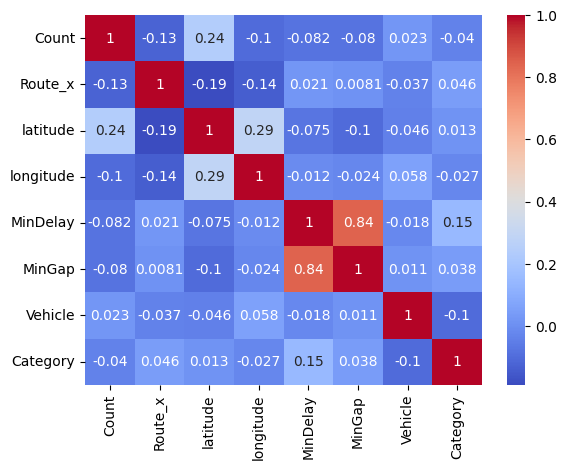

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = merged_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Conducting time series analysis

In [35]:
merged_df['DateTime'] = pd.to_datetime(merged_df['Date'] + ' ' + merged_df['Time'])
merged_df.drop(['Date', 'Time'], axis=1, inplace=True)

In [36]:
merged_df.set_index('DateTime', inplace=True)


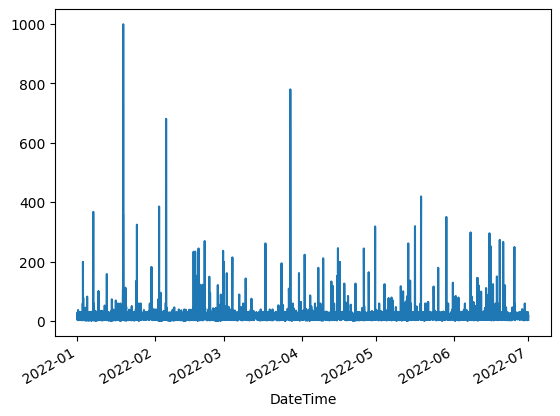

In [37]:
merged_df['MinDelay'].plot()
plt.show()

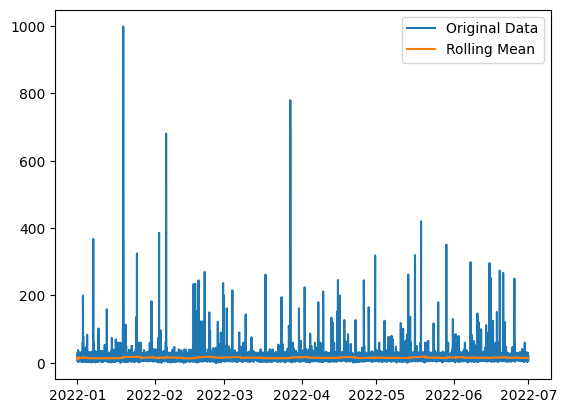

In [38]:
# Calculating the rolling mean of the 'MinDelay' column with a window of 7 days
merged_df = merged_df.sort_index()
rolling_mean = merged_df['MinDelay'].rolling(window='7D').mean()
plt.plot(merged_df['MinDelay'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.legend()
plt.show()


In [39]:
merged_df.head()

,Location,Count,Route_x,latitude,longitude,Day,Incident,MinDelay,MinGap,Direction,Vehicle,Month,Category
DateTime,,,,,,,,,,,,,
2022-01-01 00:00:00,"SHEPPARD and MCCOWAN, Toronto",23,85,NaN,NaN,Saturday,Mechanical,10,20,E,9077,January,0.0
2022-01-01 00:30:00,"DON MILLS , Toronto",214,85,43.775347,-79.345944,Saturday,Operations - Operator,22,42,E,9076,January,1.0
2022-01-01 01:00:00,"COXWELL , Toronto",88,70,43.684152,-79.323043,Saturday,Utilized Off Route,15,30,W,8435,January,0.0
2022-01-01 01:30:00,"MAIN , Toronto",67,20,43.689049,-79.301604,Saturday,Operations - Operator,15,15,N,8488,January,NaN
2022-01-01 01:30:00,"WARDEN , Toronto",284,17,43.711120,-79.279043,Saturday,Operations - Operator,18,36,N,3150,January,0.0
